# Running the small pizza_steak_sushi dataset on VGG16 model

In [1]:
import torch
from torch import nn
import torchvision
import sys
import os

sys.path.append(os.path.abspath(".."))

device  = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

# Importing the model

In [2]:
from models.modelclass.models import VGG16Lite

model_0 = VGG16Lite(num_classes = 3)
model_0.to(device)

VGG16Lite(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(

# creating the dataset

In [3]:
from pathlib import Path

data_dir = Path("./pizza_steak_sushi")
train_dir = data_dir / "train"
test_dir = data_dir / "test"

print(train_dir)
print(test_dir)

pizza_steak_sushi\train
pizza_steak_sushi\test


In [4]:
from torchvision import transforms

mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    #transforms.TrivialAugmentWide(),  # Still lightweight
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


test_transform = transforms.Compose([
    transforms.Resize(size = (224 , 224)),
    transforms.ToTensor(),
    transforms.Normalize(                     # Normalize to ImageNet mean/std
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

print(f"Train transform: {train_transform}")
print(f"Test transform: {test_transform}")

Train transform: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
Test transform: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [5]:
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(
    root = train_dir,
    transform = train_transform   
)

test_dataset = ImageFolder(
    root = test_dir,
    transform = test_transform
)

print(train_dataset)
print(test_dataset)
classes = train_dataset.classes
print(classes)

Dataset ImageFolder
    Number of datapoints: 1240
    Root location: pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset ImageFolder
    Number of datapoints: 362
    Root location: pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
['pizza', 'steak', 'sushi']


In [6]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32


train_dataloader = DataLoader(
    dataset = train_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 0,
    shuffle = True,
    pin_memory = True
)

test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 0,
    shuffle = False,
    pin_memory = True
)

In [7]:
image, label = next(iter(train_dataloader))
print(image.shape)

torch.Size([32, 3, 224, 224])


In [8]:
from torchinfo import summary

summary(model_0 , input_size=(32,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG16Lite                                [32, 3]                   --
├─Sequential: 1-1                        [32, 64, 112, 112]        --
│    └─Conv2d: 2-1                       [32, 64, 224, 224]        1,792
│    └─BatchNorm2d: 2-2                  [32, 64, 224, 224]        128
│    └─ReLU: 2-3                         [32, 64, 224, 224]        --
│    └─Conv2d: 2-4                       [32, 64, 224, 224]        36,928
│    └─BatchNorm2d: 2-5                  [32, 64, 224, 224]        128
│    └─ReLU: 2-6                         [32, 64, 224, 224]        --
│    └─MaxPool2d: 2-7                    [32, 64, 112, 112]        --
├─Sequential: 1-2                        [32, 128, 56, 56]         --
│    └─Conv2d: 2-8                       [32, 128, 112, 112]       73,856
│    └─BatchNorm2d: 2-9                  [32, 128, 112, 112]       256
│    └─ReLU: 2-10                        [32, 128, 112, 112]       --
│

In [9]:
from torch.optim import Adam
from torch import nn

optimizer = Adam(model_0.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5) # type: ignore


In [10]:
from helper.Process import run_train_test

results = run_train_test(
    model = model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    scheduler=scheduler,
    device= device,
    epochs=20
)

starting....


  0%|          | 0/20 [00:00<?, ?it/s]

[] Allocated: 13.02 MB | Reserved: 1222.00 MB


d:\FoodNet\mlvenv\Lib\site-packages\torch\optim\lr_scheduler.py:198: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch:0	Train Loss:0.9737	Train Acc:0.5246	Test Loss:0.9614	Test Acc:0.5635
[] Allocated: 36.18 MB | Reserved: 5260.00 MB
Epoch:1	Train Loss:0.8983	Train Acc:0.5900	Test Loss:0.8684	Test Acc:0.6130
[] Allocated: 36.18 MB | Reserved: 5260.00 MB
Epoch:2	Train Loss:0.8267	Train Acc:0.6282	Test Loss:1.1914	Test Acc:0.4865
[] Allocated: 36.18 MB | Reserved: 5260.00 MB
Epoch:3	Train Loss:0.8082	Train Acc:0.6282	Test Loss:0.7828	Test Acc:0.6432
[] Allocated: 36.18 MB | Reserved: 5260.00 MB
Epoch:4	Train Loss:0.7786	Train Acc:0.6699	Test Loss:0.7608	Test Acc:0.6781
[] Allocated: 36.18 MB | Reserved: 5260.00 MB
Epoch:5	Train Loss:0.7417	Train Acc:0.6931	Test Loss:0.8077	Test Acc:0.6474
[] Allocated: 36.18 MB | Reserved: 5260.00 MB
Epoch:6	Train Loss:0.7371	Train Acc:0.6862	Test Loss:0.8084	Test Acc:0.5958
[] Allocated: 36.18 MB | Reserved: 5260.00 MB
Epoch:7	Train Loss:0.6901	Train Acc:0.7065	Test Loss:0.7264	Test Acc:0.6703
[] Allocated: 36.18 MB | Reserved: 5260.00 MB
Epoch:8	Train Loss:0.662

In [12]:
def get_model_final_result(result: dict[str ,float])->dict[str, float]:
    model_result = {}
    
    for i in result:
        if i == "time":
            model_result[i] = result[i]
        else:
            model_result[i] = result[i][-1]

    return model_result

model_0_final_results =  get_model_final_result(results)
model_0_final_results

{'train_loss': 0.5255445922032381,
 'train_acc': 0.7983440170940171,
 'test_loss': 0.48111294706662494,
 'test_acc': 0.8354166666666667,
 'time': 2094.438308238983}

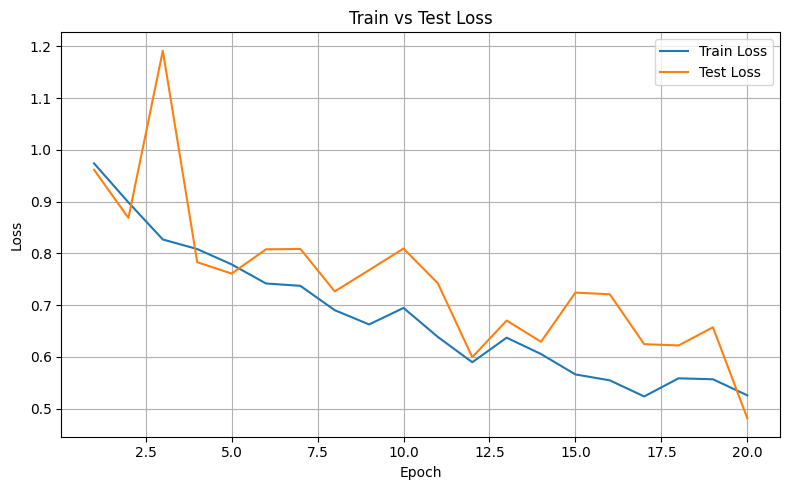

In [13]:
from helper.Visualize import plot_train_vs_test_loss

plot_train_vs_test_loss(results)

## Make some predictions

In [18]:
from helper.model_utils import make_prediction, save_model

correct = 0
wrong = 0
inf_time = 0
for data in train_dataset:
    prediction, conf, inf = make_prediction(model_0, data, classes, torch.device(device))

    if prediction == classes[data[1]]:
        correct += 1
    else:
        wrong += 1
    
    inf_time +=inf

print(f"total: {correct+wrong}")
print(f"correct: {correct}")
print(f"Incorrect: {wrong}")
print(f"average inference time: {inf_time/(correct+wrong)}")

total: 1240
correct: 1014
Incorrect: 226
average inference time: 2.5755637096774167


In [21]:
data = {
    "title": "VGG16 Lite",
    "arch": "A lightweight, custom VGG16-inspired CNN with three convolutional blocks, batch normalization, and dropout, designed for efficient small-scale image classification.",
    "desc": "This compact model is tailored for classifying pizza, steak, and sushi images. It uses fewer layers and parameters than standard VGG16, making it suitable for fast training and inference on limited datasets.",
    "train accuracy": round(results["train_acc"][-1]*100, 2),
    "training images": len(train_dataset),
    "parameters": sum(p.numel() for p in model_0.parameters())
}
loc = Path("../models")

save_model(model=model_0 , metadata=data, name="vgg16_lite_pizza_steak_sushi", loc=loc, device=torch.device(device))

model saved at ..\models\vgg16_lite_pizza_steak_sushi.pt
